names ['skimming', 'splitSignal', 'decayType', 'trigger', '>=b-jets', 'Hbb mass', '2 leptons', 'Z mass', 'MET cut', 'hhMt cut', 'final bin']
len(names) 11


<IPython.core.display.Javascript object>


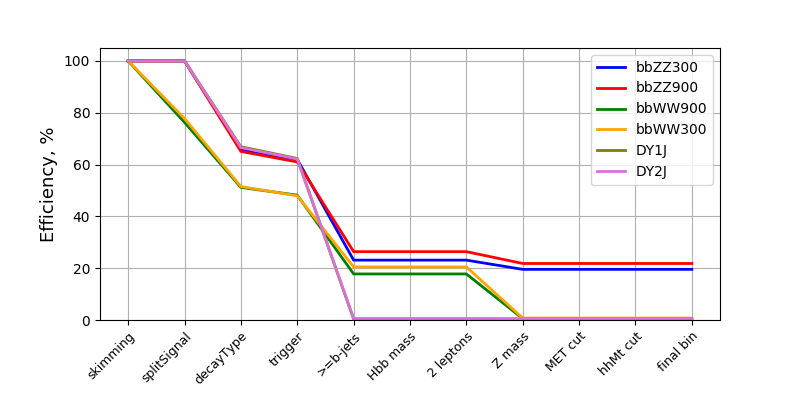

bbZZ300 [100.0, 100.0, 65.70395335678614, 62.01136559324953, 23.11249969248936, 23.11249969248936, 23.11249969248936, 19.54783635513789, 19.54783635513789, 19.54783635513789, 19.54783635513789]
bins [0.85, 1.85, 2.85, 3.85, 4.85, 5.85, 6.85, 7.85, 8.85, 9.85, 10.85]
len(bins) 11
working with bbZZ300
sampleEff [100.0, 100.0, 65.70395335678614, 62.01136559324953, 23.11249969248936, 23.11249969248936, 23.11249969248936, 19.54783635513789, 19.54783635513789, 19.54783635513789, 19.54783635513789]
len(sampleEff) 11
color blue
working with bbZZ900
sampleEff [100.0, 100.0, 65.07951737868503, 61.01129794430185, 26.38105975197294, 26.38105975197294, 26.38105975197294, 21.81510710259301, 21.81510710259301, 21.81510710259301, 21.81510710259301]
len(sampleEff) 11
color red
working with bbWW900
sampleEff [100.0, 76.30156472261736, 51.180654338549076, 48.193456614509245, 17.780938833570413, 17.780938833570413, 17.780938833570413, 0.5405405405405406, 0.5405405405405406, 0.5405405405405406, 0.540540540

/cvmfs/sft.cern.ch/lcg/views/LCG_93/x86_64-slc6-gcc62-opt/lib/python2.7/site-packages/ipykernel/__main__.py:94: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


In [100]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from math import floor, ceil
from pprint import pprint as pp
#matplotlib.get_backend()
#%matplotlib notebook
#%pylab inline
#%matplotlib inline

cutFlow_list_of_lists = {}

def makeEffCutFlowPlot(eff_dict):
    
    
    cutFlow_list_of_lists = eff_dict
    #cutFlow_list_of_lists = dict_effs
    #pp(cutFlow_list_of_lists)
    #%matplotlib notebook                                                                                                                                                                                                                                                       
    #%matplotlib inline                                                                                                                                                                                                                                                         

    names = [
        "skimming",
        "splitSignal",
        "decayType",
        "trigger",
        ">=b-jets",
        "Hbb mass",
        "2 leptons",
        "Z mass",
        "MET cut",
        "hhMt cut",
        "final bin"
        ]

    print 'names', names
    print 'len(names)', len(names)


    fig, ax = plt.subplots(1) #, figsize=(8,12))
    #plt.rcParams["figure.figsize"] = [9,16]

    # BAD STUFF!!!
    #axes = plt.axes()
    # right stuff FOR THIS TYPE OF PLOT 
    axes = plt.gca()

    bbZZ300 = cutFlow_list_of_lists.get('bbZZ300', None)
    bbZZ900 = cutFlow_list_of_lists.get('bbZZ900', None)

    bbWW900 = cutFlow_list_of_lists.get('bbWW900', None)
    bbWW300 = cutFlow_list_of_lists.get('bbWW300', None)

    TT = cutFlow_list_of_lists.get('TT', None)
    DY1J = cutFlow_list_of_lists.get('DY1J', None)
    DY2J = cutFlow_list_of_lists.get('DY2J', None)

    width=0.3
    if bbZZ300 == None:
        print 'check bbZZ300, exiting'
        sys.exit(1)
    else:
        print 'bbZZ300', bbZZ300
    bins = map(lambda x: x-width/2,range(1,len(bbZZ300)+1))
    #bins = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    print 'bins', bins
    print 'len(bins)', len(bins)
    colors = ['blue', 'red', 'green', 'orange', 'brown', 'olive', 'orchid' ]

    for idx, (sampleEff, name) in enumerate(zip([bbZZ300, bbZZ900, bbWW900, bbWW300, TT, DY1J, DY2J], ["bbZZ300", "bbZZ900", "bbWW900", "bbWW300", "TT", "DY1J", "DY2J"])):
        if sampleEff == None:
            continue
        else:
            print 'working with', name
            print 'sampleEff', sampleEff
            print 'len(sampleEff)', len(sampleEff)
            clr = colors[idx]
            print 'color', clr
            ax.plot(bins, sampleEff, lw=2, label=name, color=clr)

    
    # ax.plot(bins, bbZZ300, lw=2, label='bbZZ300', color='blue')                                                                                                                                                                                                               

    # ax.plot(bins, bbZZ900, lw=2, label='bbZZ900', color='red')                                                                                                                                                                                                                
    # ax.plot(bins, bbWW900, lw=2, label='bbWW900', color='green')                                                                                                                                                                                                              
    # ax.plot(bins, bbWW300, lw=2, label='bbWW300', color='orange')                                                                                                                                                                                                             

    # ax.plot(bins, TT, lw=2, label='TT', color='brown')                                                                                                                                                                                                                        
    # ax.plot(bins, DY1J, lw=2, label='DY1J', color='olive')                                                                                                                                                                                                                    
    # ax.plot(bins, DY2J, lw=2, label='DY2J', color='orchid')                                                                                                                                                                                                                   
    #https://matplotlib.org/examples/color/named_colors.html                                                                                                                                                                                                                    


    ax.set_axis_bgcolor('white')


    ax.legend(loc='best')

    axis_font = {'fontname':'Arial', 'size':'13'}


    #ax.set_xlabel('MET cut, GeV', 'size':'10')                 
    ax.set_ylabel('Efficiency, %', fontdict=axis_font)                                                                                                                                                                                                                         

    left = floor(bins[0])
    right = ceil (bins[-1])

    axes.set_ylim([0,105])
    #ax.set_xlim(left, right)
    
    #plt.set_xlim(left, right)
    
    fig = plt.gcf()
    #fig.set_size_inches(18.5, 10.5)
    #fig.savefig('test2png.png', dpi=100)
    #To propagate the size change to an existing gui window add forward=True

    fig.set_size_inches(8, 4, forward=True)


    #axes.yaxis.set_label_coords(-0.1,1.02)                                                                                                                                                                                                                                     
    #axes.yaxis.set_label_coords(-0.1, 100.)
    

    #https://alexpearce.me/2014/04/exponent-label-in-matplotlib/                                                                                                                                                                                                                
    #ax.get_xaxis().set_major_locator(mpl.ticker.MultipleLocator(1.0))
    #ax.set_xticklabels(names,rotation=45, rotation_mode="anchor", ha="right")
    manual_labels = bins #['0.20','0.32','0.50','0.79','1.26','2.00','3.16']
    ax.set_xticks(bins )#[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5])
    #plt.xticks(ha='left')
    fig.autofmt_xdate()

    #ax.set_xticklabels(names, minor=False)
    ax.set_xticklabels(names,rotation=45, rotation_mode="anchor", ha="right", size=9)
    ax.set_xmargin(1)
    ax.grid()
    plt.savefig('cutEff.png', bbox_inches='tight')
    plt.show()
    #plt.draw()

dict_effs = {
    'bbZZ300' : [100.0, 100.0, 65.70395335678614, 62.01136559324953, 23.11249969248936, 23.11249969248936, 23.11249969248936, 19.54783635513789, 19.54783635513789, 19.54783635513789, 19.54783635513789],
    'bbZZ900' : [100.0, 100.0, 65.07951737868503, 61.01129794430185, 26.38105975197294, 26.38105975197294, 26.38105975197294, 21.81510710259301, 21.81510710259301, 21.81510710259301, 21.81510710259301],

    'bbWW900' : [100.0, 76.30156472261736, 51.180654338549076, 48.193456614509245, 17.780938833570413, 17.780938833570413, 17.780938833570413, 0.5405405405405406, 0.5405405405405406, 0.5405405405405406, 0.5405405405405406],

    'bbWW300' : [100.0, 77.77698712018785, 51.51213264071728, 47.92570981285135, 20.486728812353235, 20.486728812353235, 20.486728812353235, 0.74717142247207, 0.74717142247207, 0.74717142247207, 0.74717142247207],

    'DY1J' :[100.0, 100.0, 66.90181826819159, 62.347240531585136, 0.28028170686808945, 0.2790940725169535, 0.2790940725169535, 0.2648424603033218, 0.2648424603033218, 0.2648424603033218, 0.2648424603033218],

    'DY2J' : [100.0, 100.0, 66.55185610409491, 62.12593549347281, 0.585480716077731, 0.5853478334821618, 0.5853478334821618, 0.5624920270442658, 0.5624920270442658, 0.5624920270442658, 0.5624920270442658]

        }
makeEffCutFlowPlot(dict_effs)